In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as ny
from sklearn import preprocessing
from sklearn import svm

In [31]:
df_test=pd.read_csv("GMSC-testing.csv")
df_train=pd.read_csv("GMSC-training.csv")

In [32]:
df_test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [33]:
print(df_train.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [34]:
df_train= df_train.fillna(df_train.mean())
df_test= df_test.fillna(df_test.mean())

In [35]:
print(df_train.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [36]:
df_train.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [37]:
df_train.corr()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002356,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.018002,-0.029669,0.117175,-0.007038,0.102261,0.045621
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006565,-0.011281,-0.001061,0.006235,-0.001048,0.001539
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.032984,0.147705,-0.061005,0.033150,-0.057159,-0.208102
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.007636,-0.055312,0.983603,-0.030565,0.987005,-0.002525
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.005355,0.049565,-0.008320,0.120046,-0.007533,-0.038287
MonthlyIncome,0.002356,-0.018002,0.006565,0.032984,-0.007636,-0.005355,1.000000,0.082319,-0.009484,0.113823,-0.008259,0.058542
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.082319,1.000000,-0.079984,0.433959,-0.071077,0.064507
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.009484,-0.079984,1.000000,-0.045205,0.992796,-0.009579
NumberRealEstateLoansOrLines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.113823,0.433959,-0.045205,1.000000,-0.039722,0.123370


In [38]:
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [39]:
df_train=df_train.drop(["age"],axis=1)
df_test=df_test.drop(["age"],axis=1)

In [40]:
df_train = df_train.drop(df_train.columns[0], axis=1)
df_test = df_test.drop(df_test.columns[0], axis=1)
df_test = df_test.drop(df_test.columns[0], axis=1)

In [41]:
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,0,0.019917,3865.0,4,0,0,0,1.0


In [42]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,1,0.024926,63588.0,7,0,1,0,0.0


In [43]:
X= df_train.drop(columns=['SeriousDlqin2yrs'])  # Replace 'target_column_name' with the name of your target column
y= df_train['SeriousDlqin2yrs']
X_test =df_test
#y_test = df_test['SeriousDlqin2yrs']


In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
df_train.shape

(150000, 10)

In [46]:
df_test.shape

(101503, 9)

In [47]:
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,0,0.019917,3865.0,4,0,0,0,1.0


In [48]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,1,0.024926,63588.0,7,0,1,0,0.0


In [49]:
model = LogisticRegression(max_iter=1500)

# Train the model on the training data
model.fit(X, y)

# Make predictions on the testing data
y_pred = model.predict(X_test)

df_test['SeriousDlqin2yrs'] = y_pred

#df_test.drop(columns=['predicted_target'], inplace=True)

print(df_test)


        RevolvingUtilizationOfUnsecuredLines  \
0                                   0.885519   
1                                   0.463295   
2                                   0.043275   
3                                   0.280308   
4                                   1.000000   
...                                      ...   
101498                              0.282653   
101499                              0.922156   
101500                              0.081596   
101501                              0.335457   
101502                              0.441842   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          0     0.177513     5700.00000   
1                                          0     0.527237     9141.00000   
2                                          0     0.687648     5083.00000   
3                                          1     0.925961     3200.00000   
4                                          

In [50]:
df_test.head(50)

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.885519,0,0.177513,5700.00000,4,0,0,0,0.000000,0
1,0.463295,0,0.527237,9141.00000,15,0,4,0,2.000000,0
2,0.043275,0,0.687648,5083.00000,12,0,1,0,2.000000,0
3,0.280308,1,0.925961,3200.00000,7,0,2,0,0.000000,0
4,1.000000,0,0.019917,3865.00000,4,0,0,0,1.000000,0
5,0.509791,0,0.342429,4140.00000,4,0,0,0,1.000000,0
6,0.587778,0,1048.000000,0.00000,5,0,0,0,3.000000,0
7,0.046149,1,0.369170,3301.00000,8,0,1,0,1.000000,0
8,0.013527,0,2024.000000,6855.03559,4,0,1,0,0.000000,0
9,1.000000,98,0.000000,0.00000,0,98,0,98,0.000000,1


In [51]:
df_test.shape
df_train.shape

(150000, 10)

In [52]:
df_test.shape

(101503, 10)

In [53]:
y_pred_mapped = ['debt' if x == 1 else 'not_debt' for x in y_pred]

# Create an ID column
df_test['ID'] = range(1, len(df_test) + 1)  # Assuming IDs start from 1

# Create a DataFrame with ID and predicted values
df_results = pd.DataFrame({'ID': df_test['ID'], 'Predicted_Value': y_pred_mapped})

# Save the results to a CSV file
df_results.to_csv('predicted_results.csv', index=False)

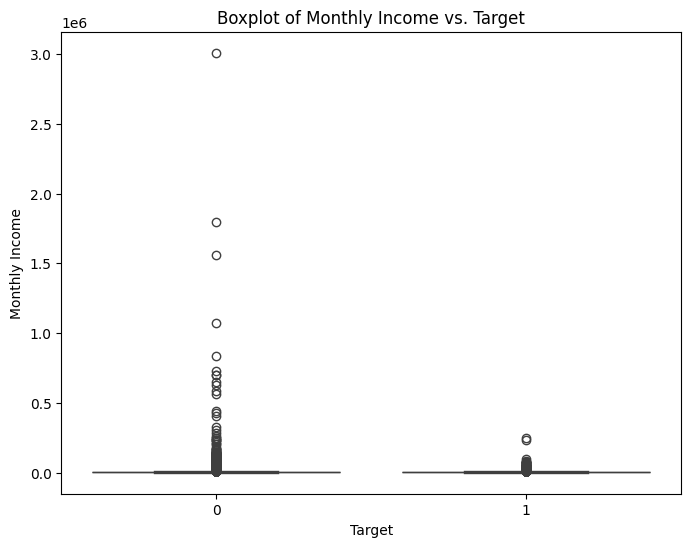

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data =df_train

# Assuming your target variable is named 'target'
target_variable = 'SeriousDlqin2yrs'

# Plot a boxplot for 'MonthlyIncome' against the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=data[target_variable], y=data['MonthlyIncome'])
plt.title('Boxplot of Monthly Income vs. Target')
plt.xlabel('Target')
plt.ylabel('Monthly Income')
plt.show()


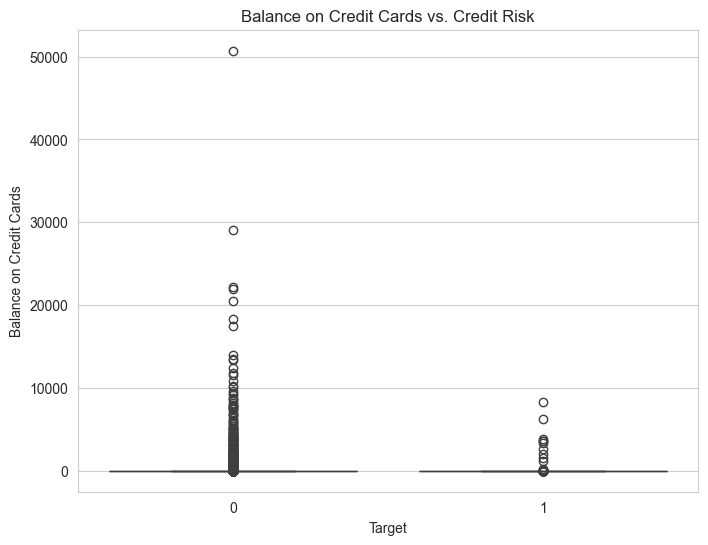

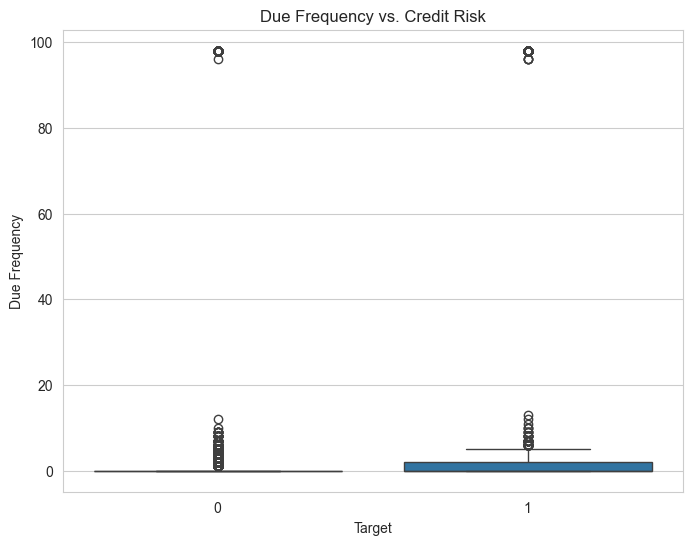

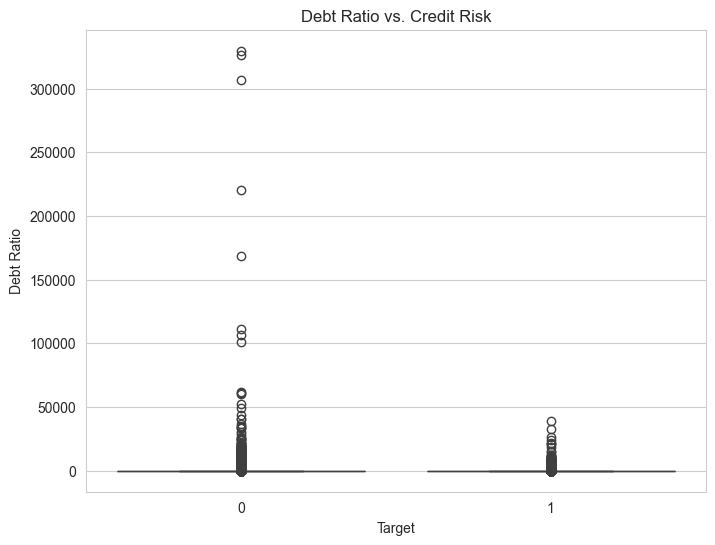

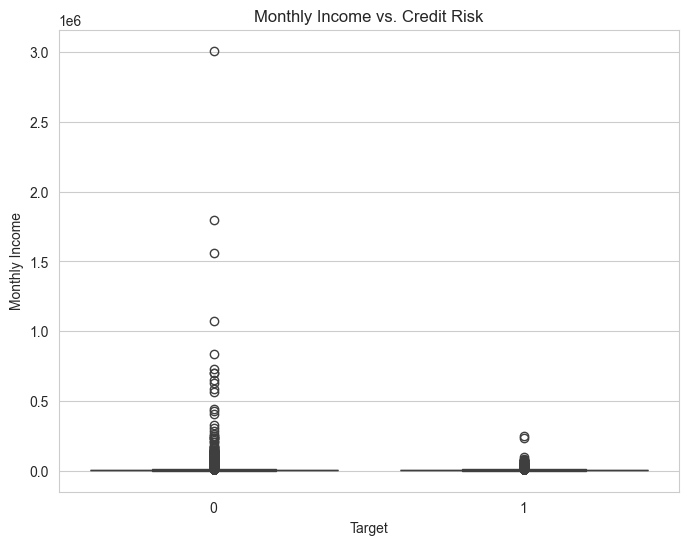

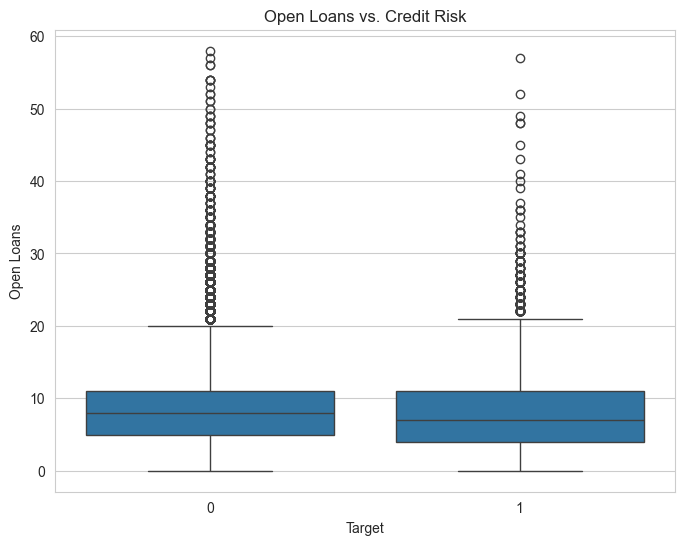

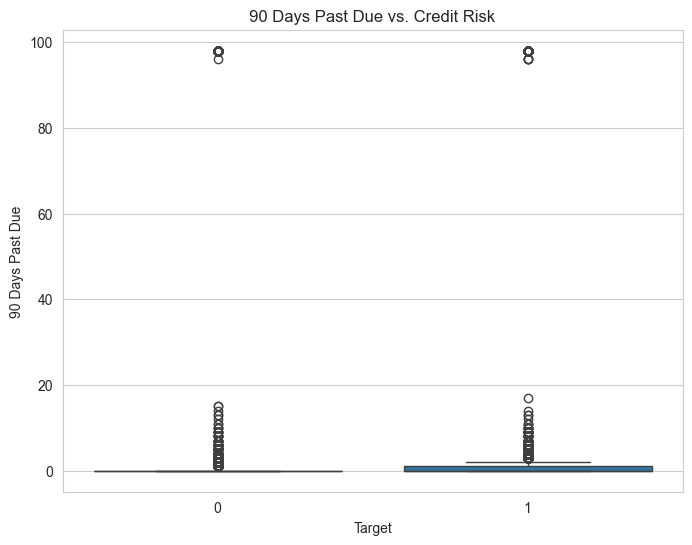

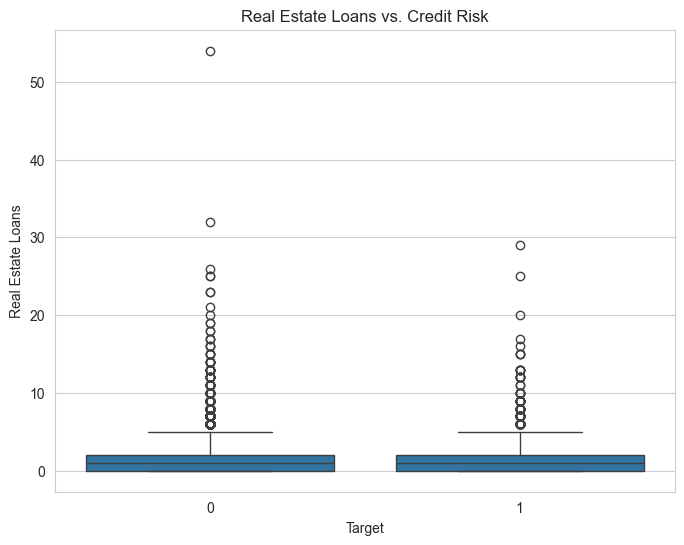

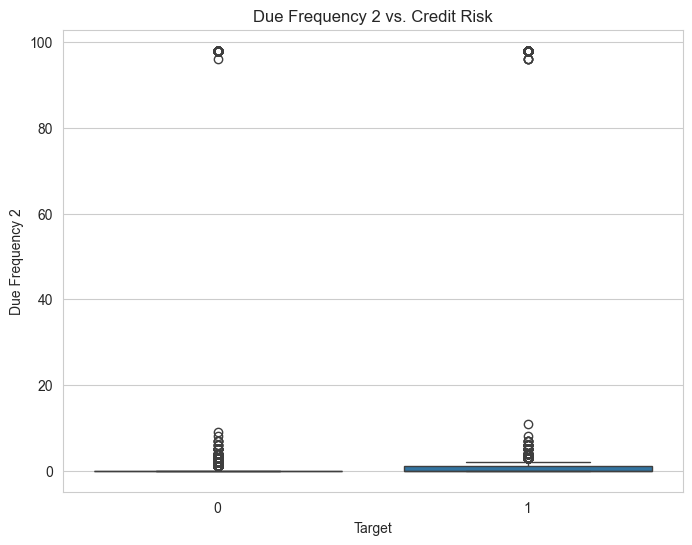

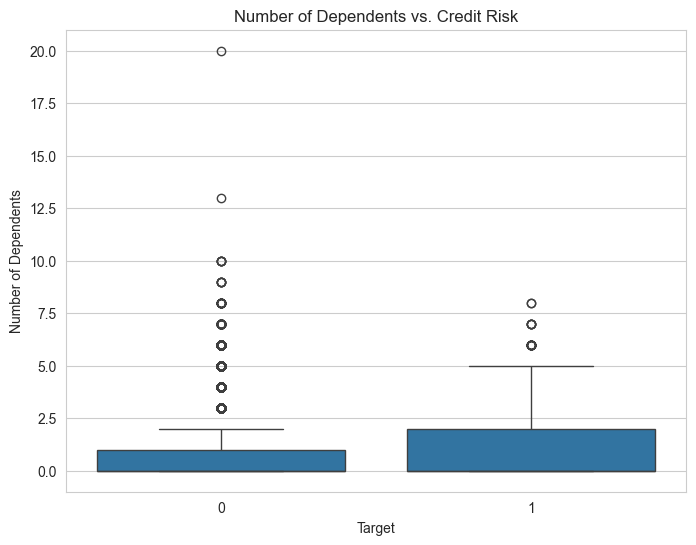

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = df_train

# Assuming your target variable is named 'target'
target_variable = 'SeriousDlqin2yrs'

# Define custom labels for the boxplot
custom_labels = {
    'Balance on Credit Cards': 'RevolvingUtilizationOfUnsecuredLines',
    'Due Frequency': 'NumberOfTime30-59DaysPastDueNotWorse',
    'Debt Ratio': 'DebtRatio',
    'Monthly Income': 'MonthlyIncome',
    'Open Loans': 'NumberOfOpenCreditLinesAndLoans',
    '90 Days Past Due': 'NumberOfTimes90DaysLate',
    'Real Estate Loans': 'NumberRealEstateLoansOrLines',
    'Due Frequency 2': 'NumberOfTime60-89DaysPastDueNotWorse',
    'Number of Dependents': 'NumberOfDependents'
}

# Plot a boxplot for each feature against the target variable
for label, column in custom_labels.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[target_variable], y=data[column])
    plt.title(f'{label} vs. Credit Risk')
    plt.xlabel('Target')
    plt.ylabel(label)
    plt.show()
